#Univariate Linear Regression  
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing `Blood Pressure`?

With my dataset I will try to predict education level (col:3) by the number of hours they work a week (col:11)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult1.csv to adult1.csv


In [ ]:
import pandas as pd
data = pd.read_csv('adult1.csv', delimiter=',')
data.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0


In [ ]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
dataset = np.genfromtxt('adult1.csv', delimiter=",", skip_header = True, usecols=(3, 11)) 

In [ ]:
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(32561, 2)

[[13. 40.]
 [13. 13.]
 [10. 40.]
 [ 6. 40.]
 [13. 40.]]


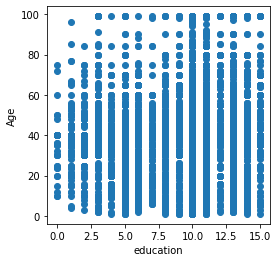

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.xlabel('education')
plt.ylabel('Age')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(dataset[:, 0], dataset[:, 1], epochs = 256, verbose = 1)

Epoch 1/256
1018/1018 [==============================] - 1s 760us/step - loss: 622.0763 - mse: 622.0763
Epoch 2/256
1018/1018 [==============================] - 1s 748us/step - loss: 298.7896 - mse: 298.7896
Epoch 3/256
1018/1018 [==============================] - 1s 747us/step - loss: 217.5590 - mse: 217.5590
Epoch 4/256
1018/1018 [==============================] - 1s 748us/step - loss: 213.8381 - mse: 213.8381
Epoch 5/256
1018/1018 [==============================] - 1s 722us/step - loss: 211.5006 - mse: 211.5006
Epoch 6/256
1018/1018 [==============================] - 1s 734us/step - loss: 209.1958 - mse: 209.1958
Epoch 7/256
1018/1018 [==============================] - 1s 735us/step - loss: 207.0047 - mse: 207.0047
Epoch 8/256
1018/1018 [==============================] - 1s 731us/step - loss: 204.8464 - mse: 204.8464
Epoch 9/256
1018/1018 [==============================] - 1s 730us/step - loss: 202.6953 - mse: 202.6953
Epoch 10/256
1018/1018 [==============================] - 1s 754

In [ ]:
print('Model weights - w0(slope m), bias):')
w0 = model.layers[0].get_weights()[0][0]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(b0)

Model weights - w0(slope m), bias):
[0.61080116]
[34.302483]


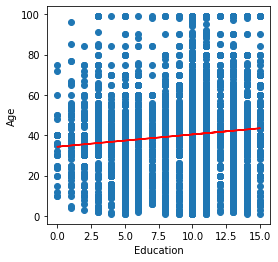

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.plot(dataset[:, 0], b0 + w0 * dataset[:, 0], '-', color = 'red')
plt.xlabel('Education')
plt.ylabel('Age')
plt.show()